In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/wavenet


In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, sample, audio, datasets, utils, viz

# Train on a single Track

Run this on a GPU. The main point is to try to overfit a single track.

In [3]:
dry = True
if dry:
    os.environ['WANDB_MODE'] = 'dryrun'

In [9]:
p = model.HParams(n_audio_chans=2)
ds, ds_test = datasets.tracks('fixtures/aria.wav', 0.2, p)
X, Y = ds[:]
X.shape

torch.Size([466, 2, 16000])

In [16]:
m = model.Wavenet(p)
t = train.Trainer(m, ds, ds_test, train.HParams(max_epochs=1, batch_size=8, num_workers=8, learning_rate=0.0026), None)

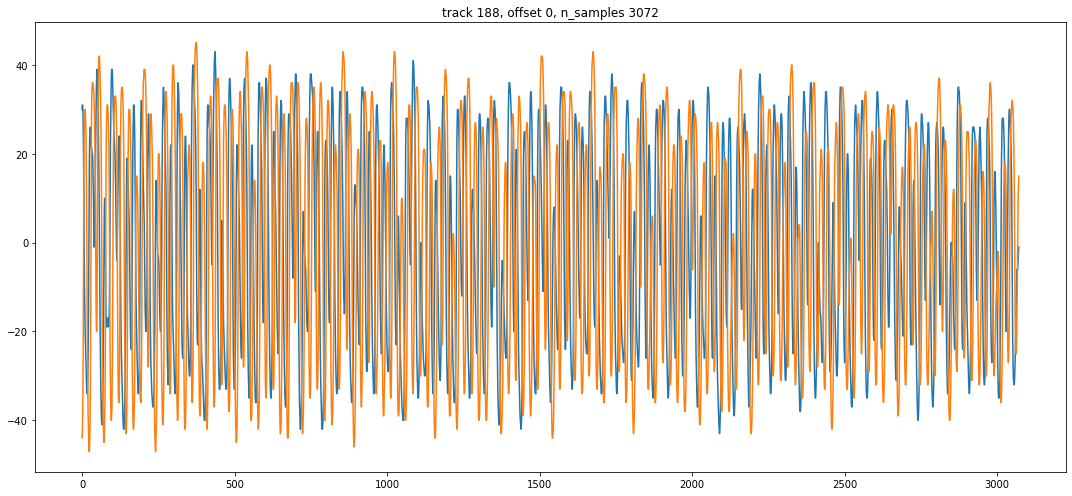

In [17]:
track_i = viz.plot_track(X[:], n_samples=p.receptive_field_size())

In [18]:
ipd.Audio(audio.mu_expand(X[track_i][:p.receptive_field_size()].numpy(), p), rate=p.sampling_rate)

In [19]:
t.train()

wandb: Offline run mode, not syncing to the cloud.
wandb: W&B syncing is set to `offline` in this directory.  Run `wandb online` to enable cloud syncing.
wandb: WARNING Symlinked 2 files into the W&B run directory, call wandb.save again to sync new files.
  0%|          | 0/59 [00:00<?, ?it/s]/home/purzelrakete/src/github.com/feldberlin/wavenet/.venv/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:64: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
1:58 loss 3.86754 lr 3.769655e-06: 100%|██████████| 59/59 [01:22<00:00,  1.40s/it]


In [20]:
_, track = sample.sample(m, decoder=utils.decode_nucleus(), n_samples=32000, batch_size=10)

7

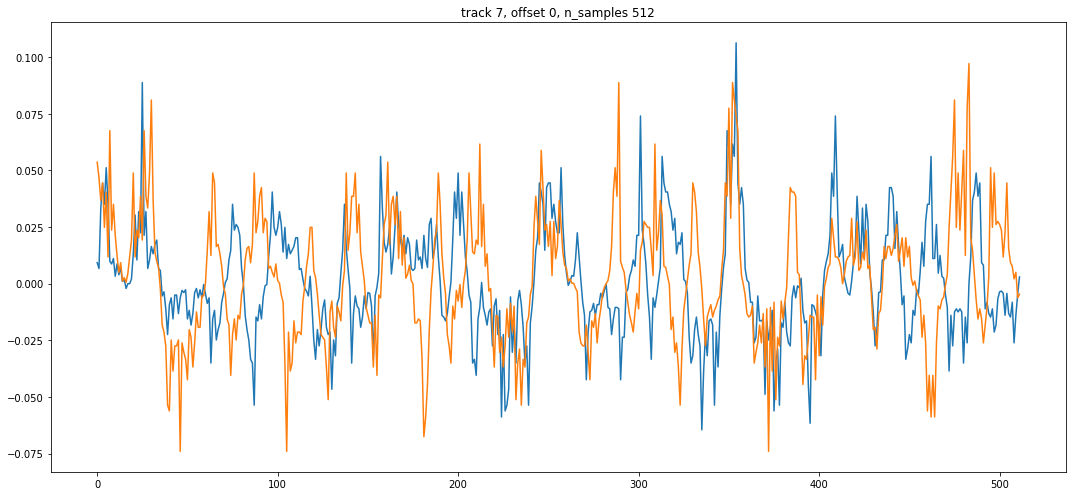

In [21]:
viz.plot_track(track, n_samples=p.receptive_field_size() // 6)

In [22]:
ipd.Audio(track[0], rate=p.sampling_rate)